In [100]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("singhnavjot2062001/product-advertising-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/emirysaglam/.cache/kagglehub/datasets/singhnavjot2062001/product-advertising-data/versions/82


In [101]:
import os

print(os.listdir(path)[0])


Advertising_Data.csv


In [102]:
import pandas as pd

df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0
...,...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56,6851.0
296,512.38,250.83,373.78,366.95,987.14,509.03,6477.0
297,998.10,858.75,781.06,60.61,174.63,213.53,6949.0
298,322.35,681.22,640.29,343.65,534.22,648.71,7737.0


In [103]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


## EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


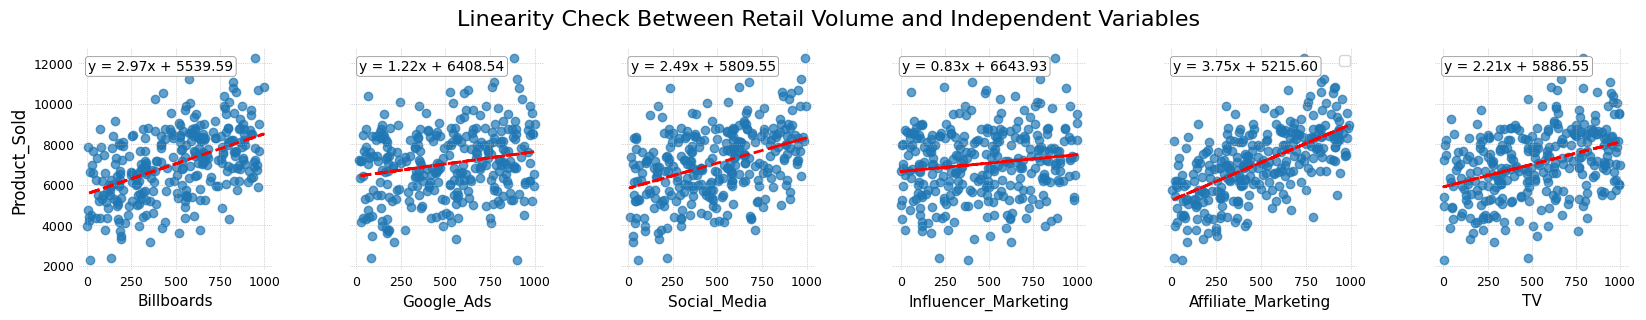

In [104]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Product_Sold", fontsize=12)

for i, col in enumerate(df.columns):
    if col == "Product_Sold":
        continue
    ax = axes[i-1]
    x = df[col]
    y = df["Product_Sold"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

Affiliate marketing appears to be the most cost-effective channel for driving product sales, followed by billboards, social media, and lastly television.

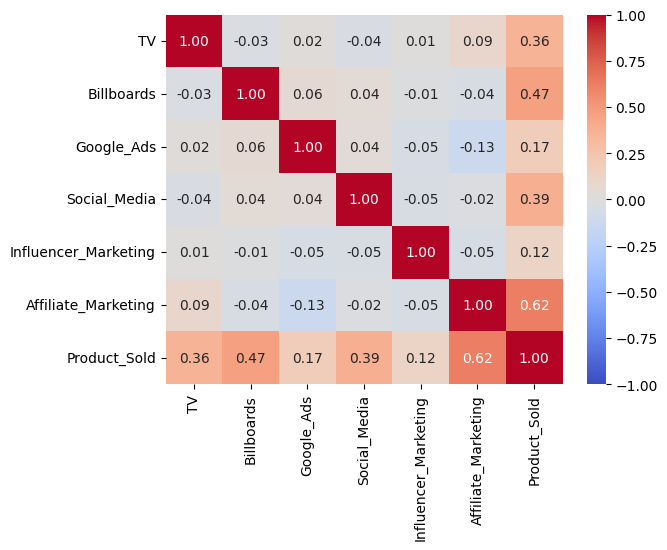

In [105]:
from scipy.stats import spearmanr
import seaborn as sns


# Calculate the correlation and p-values
columns = df.columns
corr_matrix, p_value_matrix = spearmanr(df)
corr_matrix = pd.DataFrame(corr_matrix, index=columns, columns=columns)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

The correlation matrix supports our earlier finding

In [106]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [107]:
df_perc = df.copy()

In [108]:
df_perc['Total_Spend'] = df_perc["TV"]+df_perc["Billboards"]+df_perc["Google_Ads"]+df_perc["Social_Media"]+df_perc["Influencer_Marketing"]+df_perc["Affiliate_Marketing"]
df_perc['TV_perc'] = df_perc["TV"] / df_perc['Total_Spend']
df_perc['Billboards_perc'] = df_perc["Billboards"] / df_perc['Total_Spend']
df_perc['Google_Ads_perc'] = df_perc["Google_Ads"] / df_perc['Total_Spend']
df_perc['Social_Media_perc'] = df_perc["Social_Media"] / df_perc['Total_Spend']
df_perc['Influencer_Marketing_perc'] = df_perc["Influencer_Marketing"] / df_perc['Total_Spend']
df_perc['Affiliate_Marketing_perc'] = df_perc["Affiliate_Marketing"] / df_perc['Total_Spend']
df_perc['Campaign_Effectiveness'] = df_perc["Product_Sold"] / df_perc['Total_Spend']

df_alternete = df_perc.copy()
df_alternete.drop(columns=['TV_perc', 'Billboards_perc', 'Google_Ads_perc', 'Social_Media_perc',
       'Influencer_Marketing_perc', 'Affiliate_Marketing_perc'], inplace=True) 
df_perc.drop(columns=['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing'], inplace=True) 

In [109]:
df_perc

,Product_Sold,Total_Spend,TV_perc,Billboards_perc,Google_Ads_perc,Social_Media_perc,Influencer_Marketing_perc,Affiliate_Marketing_perc,Campaign_Effectiveness
0,7164.0,2446.33,0.115038,0.220248,0.050664,0.142785,0.099238,0.372027,2.928468
1,5055.0,2651.67,0.265105,0.111828,0.210482,0.068089,0.294554,0.049942,1.906346
2,6154.0,2660.89,0.117682,0.111218,0.241633,0.190053,0.164949,0.174464,2.312760
3,5480.0,2460.68,0.365151,0.024900,0.222999,0.097912,0.113367,0.175671,2.227027
4,9669.0,3873.74,0.197876,0.142168,0.168290,0.172012,0.102312,0.217343,2.496037
...,...,...,...,...,...,...,...,...,...
295,6851.0,3121.09,0.246725,0.160636,0.222550,0.055192,0.183353,0.131544,2.195066
296,6477.0,3000.11,0.170787,0.083607,0.124589,0.122312,0.329035,0.169670,2.158921
297,6949.0,3086.68,0.323357,0.278212,0.253042,0.019636,0.056575,0.069178,2.251286
298,7737.0,3170.44,0.101674,0.214866,0.201956,0.108392,0.168500,0.204612,2.440355


In [110]:
df_perc.describe()

,Product_Sold,Total_Spend,TV_perc,Billboards_perc,Google_Ads_perc,Social_Media_perc,Influencer_Marketing_perc,Affiliate_Marketing_perc,Campaign_Effectiveness
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,7031.523333,2972.483367,0.173262,0.168797,0.172715,0.164768,0.156827,0.163632,2.366279
std,1703.614951,672.237327,0.093616,0.091969,0.096476,0.089771,0.095429,0.093056,0.238848
min,2259.000000,1150.110000,0.000733,0.002014,0.005131,0.006109,0.000357,0.002614,1.591708
25%,5922.500000,2547.990000,0.104773,0.098991,0.103587,0.096712,0.076186,0.092823,2.208384
50%,7051.000000,3032.070000,0.166807,0.167079,0.170484,0.165140,0.159484,0.154984,2.357953
75%,8278.000000,3364.857500,0.238362,0.233881,0.235963,0.221363,0.222558,0.228284,2.517427
max,12227.000000,5225.420000,0.479444,0.523904,0.634647,0.444785,0.408448,0.495439,2.955309


In [111]:
df_perc.sort_values(by='Campaign_Effectiveness', ascending=True).head(10)

,Product_Sold,Total_Spend,TV_perc,Billboards_perc,Google_Ads_perc,Social_Media_perc,Influencer_Marketing_perc,Affiliate_Marketing_perc,Campaign_Effectiveness
145,2259.0,1419.23,0.000733,0.013867,0.634647,0.039225,0.267067,0.044461,1.591708
114,5255.0,2969.20,0.212899,0.112067,0.294918,0.021376,0.329964,0.028775,1.769837
118,4481.0,2460.84,0.117159,0.094838,0.380740,0.141992,0.243258,0.022013,1.820923
88,4368.0,2372.63,0.106907,0.021655,0.175792,0.290652,0.373413,0.031581,1.840995
220,6522.0,3475.35,0.225413,0.053281,0.287050,0.166406,0.233513,0.034336,1.876646
223,3947.0,2085.48,0.242654,0.140965,0.069979,0.143674,0.392874,0.009854,1.892610
1,5055.0,2651.67,0.265105,0.111828,0.210482,0.068089,0.294554,0.049942,1.906346
262,4333.0,2250.81,0.067851,0.032388,0.331792,0.131415,0.314660,0.121894,1.925085
253,5729.0,2973.88,0.216179,0.068352,0.258756,0.159741,0.246325,0.050648,1.926440
87,6184.0,3190.93,0.151774,0.268771,0.303861,0.015679,0.252986,0.006929,1.937993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


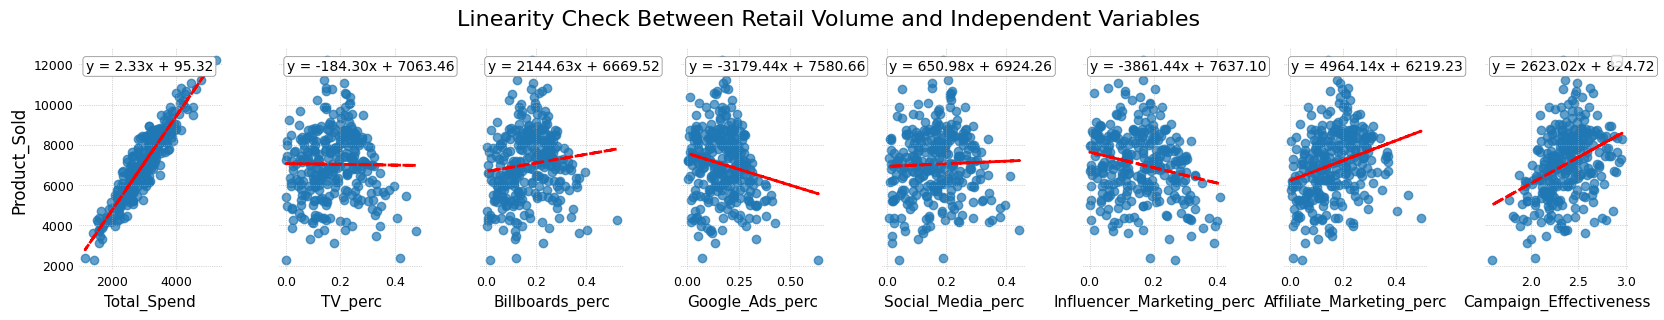

In [112]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df_perc.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Product_Sold", fontsize=12)

for i, col in enumerate(df_perc.columns):
    if col == "Product_Sold":
        continue
    ax = axes[i-1]
    x = df_perc[col]
    y = df_perc["Product_Sold"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


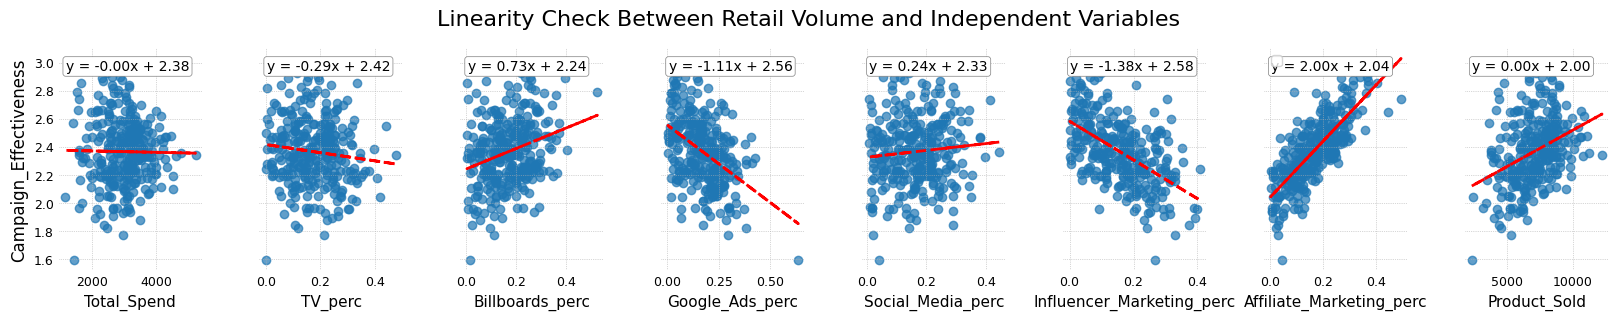

In [113]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df_perc.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Campaign_Effectiveness", fontsize=12)

for i, col in enumerate(df_perc.columns):
    if col == "Campaign_Effectiveness":
        continue
    ax = axes[i-1]
    x = df_perc[col]
    y = df_perc["Campaign_Effectiveness"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

Supporting our previous findings, we observe that an increase in the percentage of affiliate marketing costs within total marketing expenditure is associated with higher product sales. Billboards show a similar positive effect. In contrast, social media spending appears to have minimal impact on sales, while other channels show a negative relationship. This may suggest that, unlike affiliate marketing and billboards, the remaining channels have a lower effectiveness threshold, beyond which additional spending yields diminishing or negative returns.

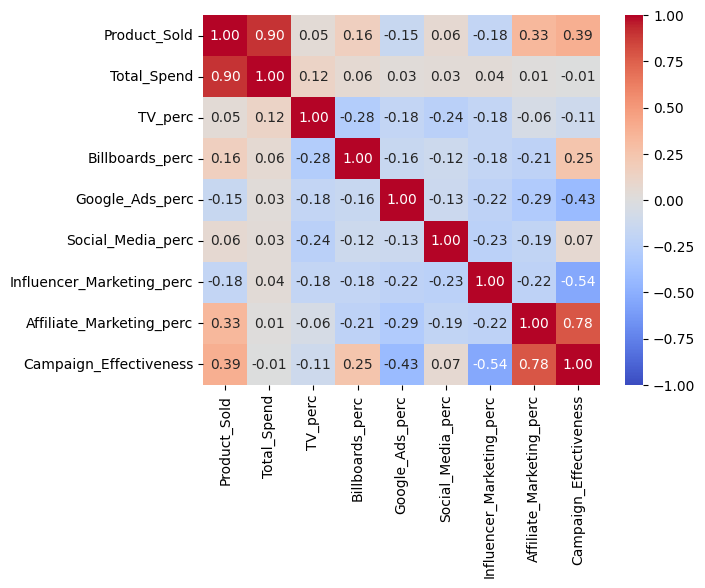

In [114]:

# Calculate the correlation and p-values
columns = df_perc.columns
corr_matrix, p_value_matrix = spearmanr(df_perc)
corr_matrix = pd.DataFrame(corr_matrix, index=columns, columns=columns)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

The correlation matrix supports the finding

The exploratory data analysis (EDA) indicates that affiliate marketing is the most effective advertising channel in driving product sales, followed by billboards. While social media contributes modestly and can be used to diversify the marketing mix, Google Ads, influencer marketing, and TV show minimal to no measurable impact on sales performance.

## Linear Regression Assumpitons

### Assumption 1: Variable Types
We observe that each feature has float values, which satisfies the continuity assumption.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


### Assumption 2: Linearity
We can see that connection between the dependent
variable (sales) and each independent variable (ads) is linear.

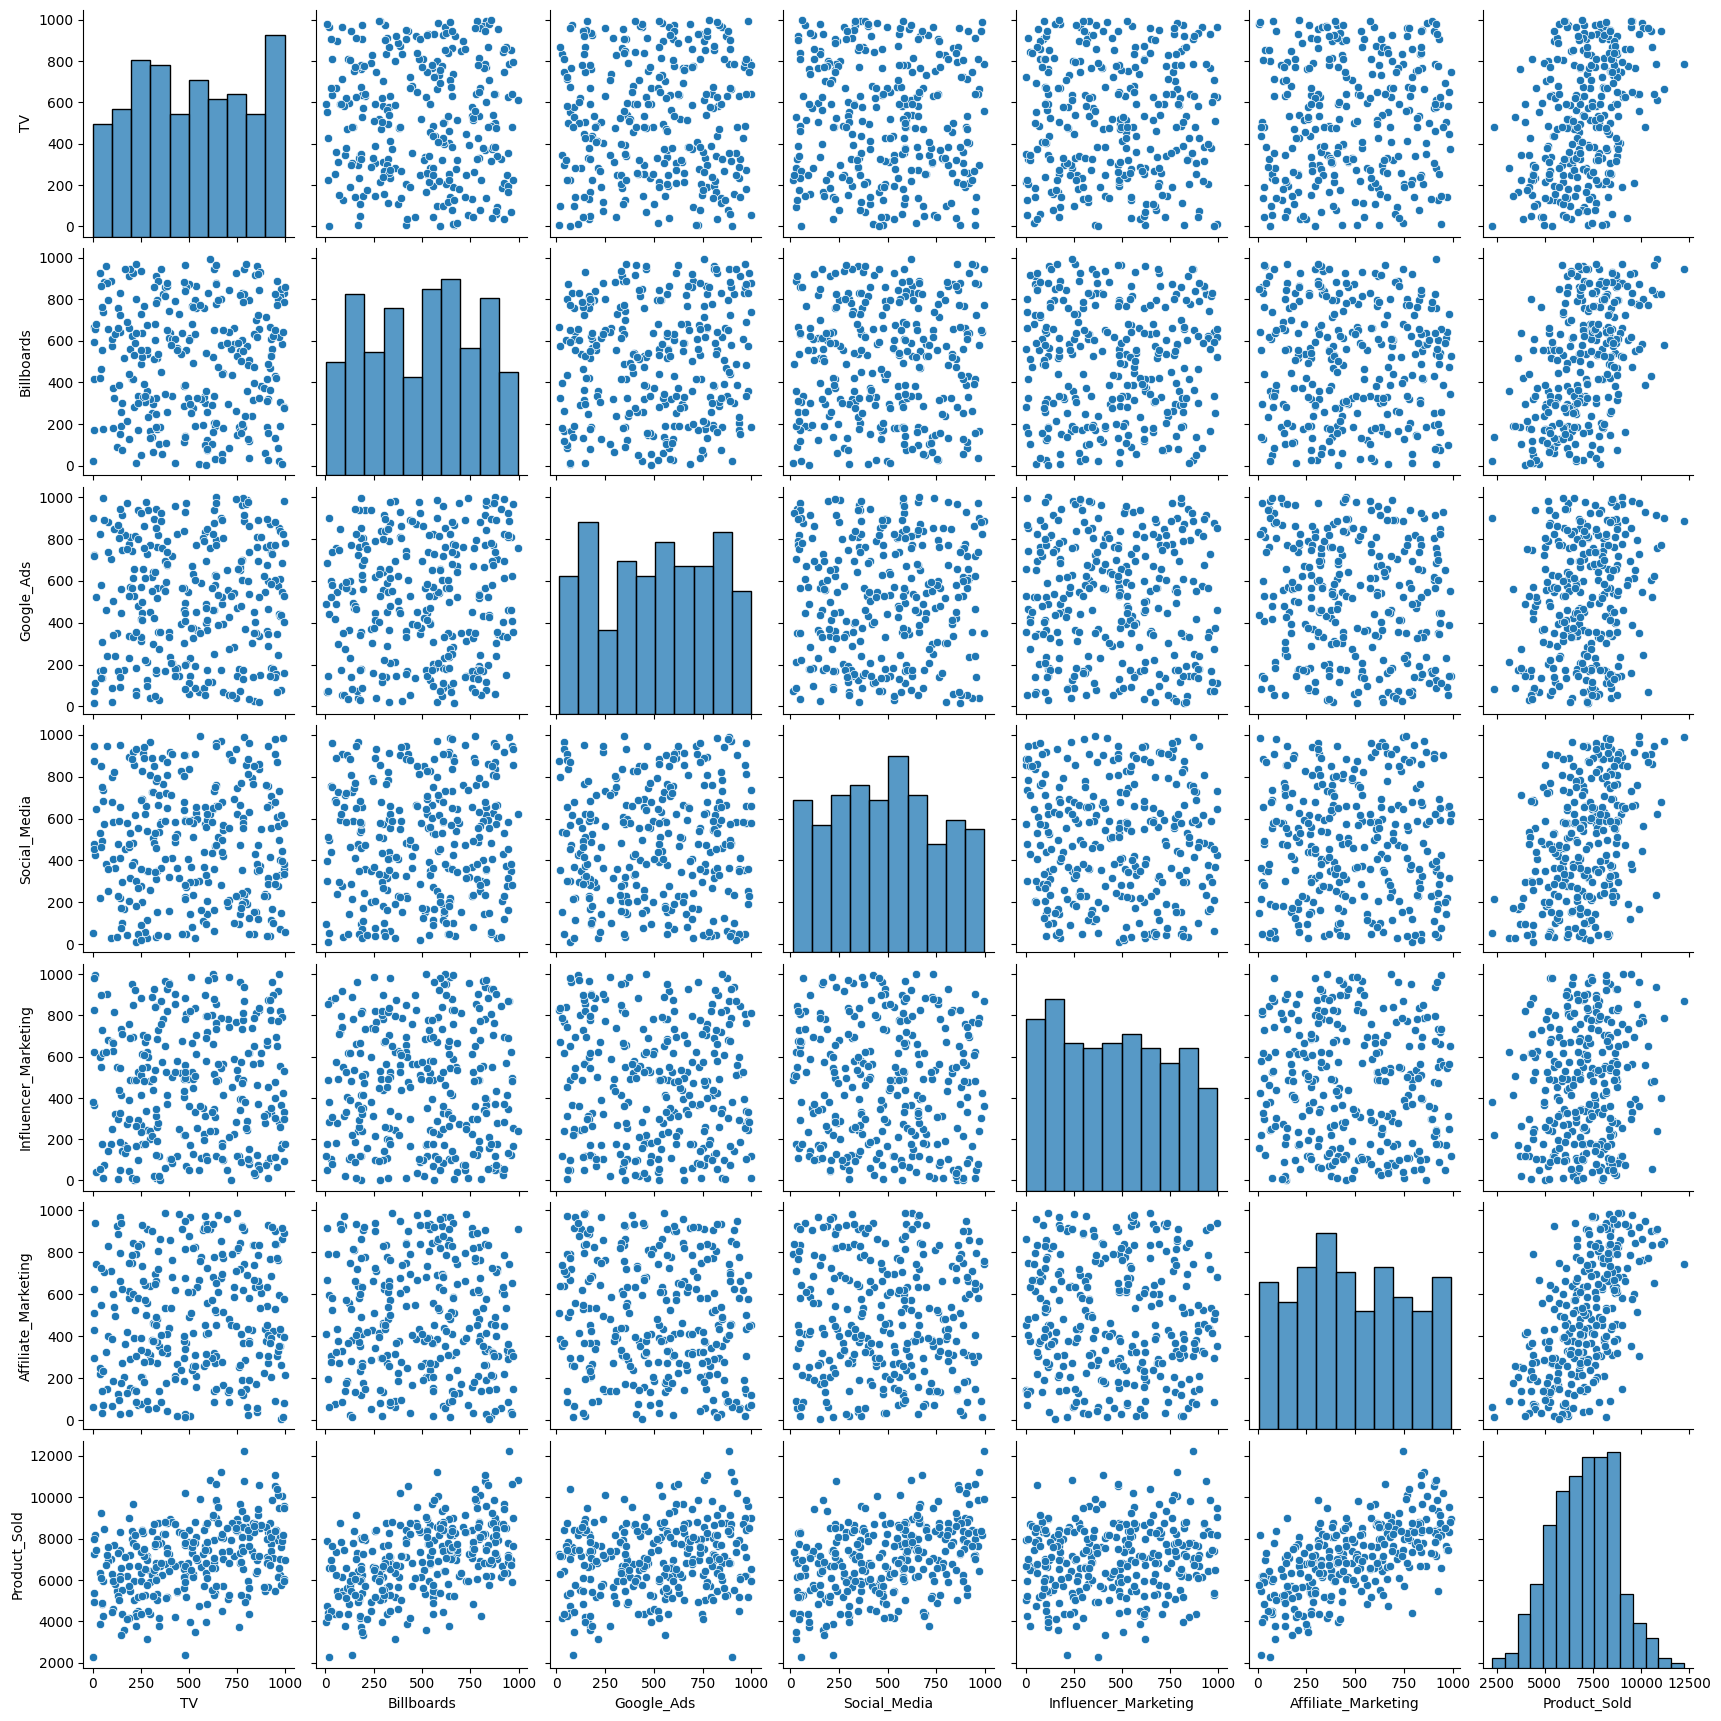

In [116]:
import seaborn as sns

sns.pairplot(df)

### Assumption 3: Normal Distribution of Residuals & Assumption 4: Homoscedasticity

From the plots below, we observe that the residuals are normally distributed and exhibit homoscedasticity.


                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:00:06   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0887 

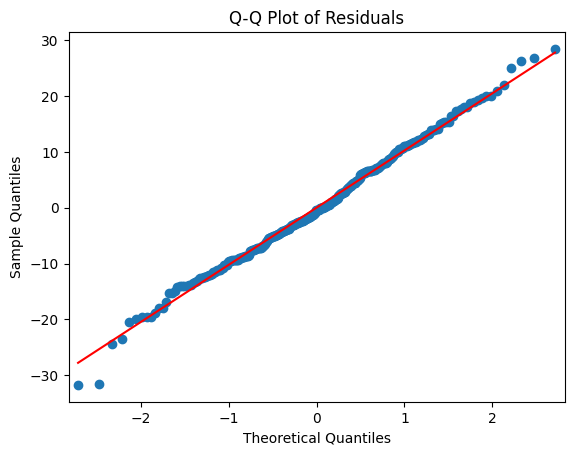

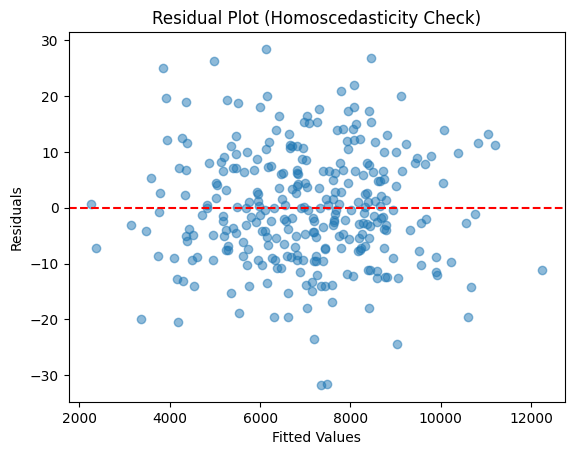

In [117]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Step 3: Build formula string
formula = 'Product_Sold ~ TV + Billboards + Google_Ads + Social_Media + Influencer_Marketing + Affiliate_Marketing'

# Step 4: Fit OLS model
model_sm = ols(formula, data=df).fit()
print(model_sm.summary())

# Step 5: Q-Q plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

plt.scatter(model_sm.fittedvalues, model_sm.resid, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Homoscedasticity Check)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [118]:
anova_table = sm.stats.anova_lm(model_sm, typ=2)
anova_table = anova_table[anova_table["PR(>F)"] < 0.05].sort_values(by="sum_sq", ascending=False)
anova_table

,sum_sq,df,F,PR(>F)
Affiliate_Marketing,3.583605e+08,1.0,3.338226e+06,0.0
Billboards,2.031039e+08,1.0,1.891969e+06,0.0
Social_Media,1.391994e+08,1.0,1.296681e+06,0.0
TV,9.825695e+07,1.0,9.152905e+05,0.0
Google_Ads,5.333111e+07,1.0,4.967940e+05,0.0
Influencer_Marketing,3.547687e+07,1.0,3.304768e+05,0.0


The ANOVA table indicates that all features are statistically significant.

### Assumption 5: Multicolinearity
Variance inflation factor result shows that there is no multicolinearity since all values below 5.

In [119]:
df.columns


Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


selected_features = [ 'TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing']
X = df[selected_features]
y = df['Product_Sold']

# Add intercept after scaling
X_vif = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif['Variable'] = ['const'] + selected_features
vif['VIF'] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
vif

,Variable,VIF
0,const,20.714442
1,TV,1.011536
2,Billboards,1.006814
3,Google_Ads,1.027308
4,Social_Media,1.007057
5,Influencer_Marketing,1.008573
6,Affiliate_Marketing,1.030827


## Building the Model

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print("Intercept:", regr.intercept_)
print("R-squared:", regr.score(X_test, y_test))
print("MAE:", mean_absolute_error(y_test,regr.predict(X_test)))
print("MSE:", mean_squared_error(y_test,regr.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))



Intercept: 1.3474765058326739
R-squared: 0.9999736866138691
MAE: 7.085373922626134
MSE: 75.36591771291803
RMSE: 8.68135460126575


Since the mean of the target variable (products sold) is 7,031, the intercept (1.3) is very low, indicating it has minimal bias at zero. Additionally, the R-squared value of 0.99 demonstrates that the model explains 99% of the variance in product sales. Both factors suggest our model is highly accurate in estimating product sales. Furthermore, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are very low relative to the mean, confirming minimal prediction errors. Overall, the model performs exceptionally well in estimating product sales.

In [123]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': regr.coef_})
print(coef_df)


                Feature  Coefficient
0                    TV     2.001823
1            Billboards     2.998532
2            Google_Ads     1.498071
3          Social_Media     2.499797
4  Influencer_Marketing     1.199659
5   Affiliate_Marketing     3.996625


Looking at the coefficients, affiliate marketing and billboards have the greatest positive impact on sales, confirming the findings from the EDA stage.

In [124]:
import pandas as pd
import numpy as np

# Stack true and predicted values vertically
stacked = np.vstack((y_test.values, regr.predict(X_test)))

# Transpose to make each row a sample
stacked = stacked.T

# Create a DataFrame with column names
result = pd.DataFrame(stacked, columns=['Actual', 'Predicted']).astype(int)

result["Difference"] = result["Actual"] - result["Predicted"]
result

,Actual,Predicted,Difference
0,5728,5734,-6
1,8574,8576,-2
2,8277,8269,8
3,8652,8650,2
4,8297,8297,0
5,4358,4351,7
6,10841,10828,13
7,8368,8364,4
8,7627,7621,6
9,4212,4205,7
